In [ ]:
import pandas as pd 

data = pd.read_csv('p_movie.csv')

In [ ]:
raw_data = data[['score','text']]

In [ ]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

In [ ]:
text = raw_data['text']
type(text)

In [ ]:
from bs4 import BeautifulSoup
import re

web = r'www\.[^ ]+'

def comment_to_words(text):
    '''
    数据清理，去掉表情等非单词数据
    '''
    text = str(text)
    text = BeautifulSoup(text).get_text()

    words = re.sub("[^a-zA-Z]", " ", text)
    words = words.lower().split()
    words = [w for w in words if not w in stops]

    words = " ".join(words)

    return words

In [ ]:
from tqdm import tqdm
n_text = len(text)
clean_text = []
for i in range(n_text):
    if (i+1)%100000 == 0:
        print('{} have been cleaned!'.format((i+1)/n_text))
    
    clean_text.append(comment_to_words(text[i]))

In [ ]:
raw_data.score.head

In [ ]:
raw_data.iloc[10426]

In [ ]:
def drop_nan(data):
    for i, value in enumerate(data.score.values):
        try:
            value = float(value)
        except:
            data.drop(labels=i,inplace=True)

In [ ]:
clean_data = pd.DataFrame(clean_text,columns=['text'])
clean_data['score'] = raw_data['score']
drop_nan(clean_data)
clean_data.reset_index(drop=True, inplace=True)
clean_data.head

In [ ]:
clean_data.to_csv('clean_data.csv')

In [48]:
import pandas as pd
clean_data = pd.read_csv('clean_data.csv')

In [3]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
def wordcloud_fig(data, colormap='viridis'):
    words = []
    for t in data.text:
        words.append(t)
    # print(words)
    words = pd.Series(words).str.cat(sep=' ')
    wordcloud = WordCloud(width=1000, height=500, max_font_size=150, colormap=colormap).generate(words)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

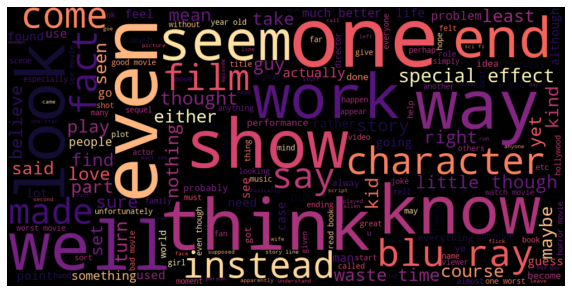

In [129]:

wordcloud_fig(clean_data[(clean_data.score) < 3],'magma')

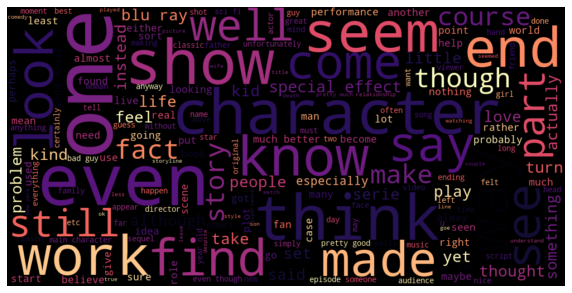

In [5]:

wordcloud_fig(clean_data[(clean_data.score) == 3], 'magma')

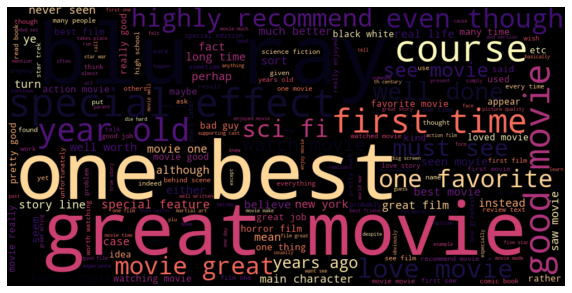

In [6]:
wordcloud_fig(clean_data[(clean_data.score) > 3], 'magma')

In [7]:
def word_freq(data, max_features):
    count_vec = CountVectorizer(stop_words = 'english', max_feature = max_features)
    count_vec.fit(data.text)
    print('number of unique words:'+ str(len(count_vec.get_feature_names())))

    neg_mat = count_vec.transform(data[data.score < 3].text)
    pos_mat = count_vec.transform(data[data.score > 3].text)
    neu_mat = count_vec.transform(data[data.score == 3].text)
    neg_freq = np.squeeze(np.asarray(np.sum(neg_mat, axis=0)))
    pos_freq = np.squeeze(np.asarray(np.sum(pos_mat, axis=0)))
    neu_freq = np.squeeze(np.asarray(np.sum(neu_mat, axis=0)))

    df_freq = pd.DataFrame([neg_freq, neu_freq, pos_freq], columns=count_vec.get_feature_names()).transpose()
    df_freq.columns = ['neg','neu','pos']
    df_freq['total'] = df_freq['neg'] + df_freq['neu'] + df_freq['pos']
    df_freq = df_freq.sort_values('total', ascending=False)

    return df_freq


In [8]:
def plot_top(data, n, sentiment):
    y = np.arange(n)

    plt.figure(figsize=(10,8))
    plt.bar(y, data.sort_values(by=sentiment, ascending=False)[sentiment][:n], align='center', alpha=0.5)
    plt.xticks(y, data.sort_values(by=sentiment, ascending=False).index[:n], rotation=90)
    plt.xlabel('word')
    plt.ylabel('frequecy')

In [49]:
count_vec = CountVectorizer(stop_words='english')
# clean_data['text'] = clean_data.text.replace('',np.nan, regex=True)
# count_vec.fit(clean_data.text)
clean_data = clean_data.dropna(how='any')
clean_data.reset_index(drop=True)
# clean_data.drop(columns=['Unnamed:0'])
# clean_data.text.isnull().sum()
clean_data.to_csv('f_clean.csv')
# print('number of unique words:'+ str(len(count_vec.get_feature_names())))

In [51]:
count_vec.fit(clean_data.text)

CountVectorizer(stop_words='english')

In [52]:
print('number of unique words:'+ str(len(count_vec.get_feature_names())))

number of unique words:475213


In [54]:
neg_mat = count_vec.transform(clean_data[clean_data.score < 3].text)
pos_mat = count_vec.transform(clean_data[clean_data.score > 3].text)
neu_mat = count_vec.transform(clean_data[clean_data.score == 3].text)
neg_freq = np.squeeze(np.asarray(np.sum(neg_mat, axis=0)))
pos_freq = np.squeeze(np.asarray(np.sum(pos_mat, axis=0)))
neu_freq = np.squeeze(np.asarray(np.sum(neu_mat, axis=0)))

df_freq = pd.DataFrame([neg_freq, neu_freq, pos_freq], columns=count_vec.get_feature_names()).transpose()
df_freq.columns = ['neg','neu','pos']
df_freq['total'] = df_freq['neg'] + df_freq['neu'] + df_freq['pos']
df_freq = df_freq.sort_values('total', ascending=False)

In [56]:
df_freq.to_csv('df_freq.csv')

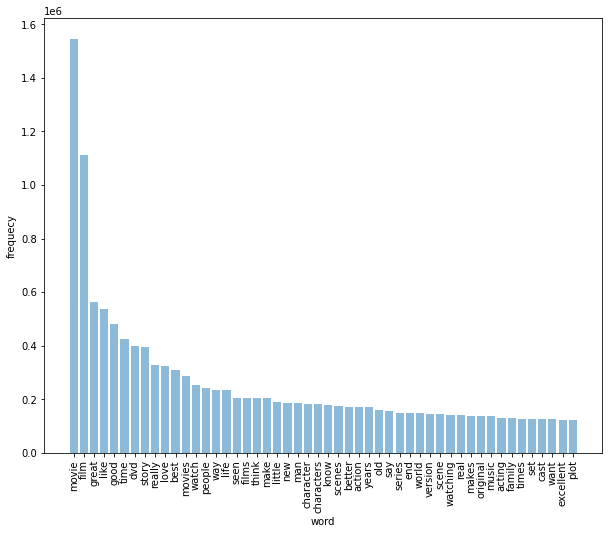

In [57]:
plot_top(df_freq, 50, 'pos')

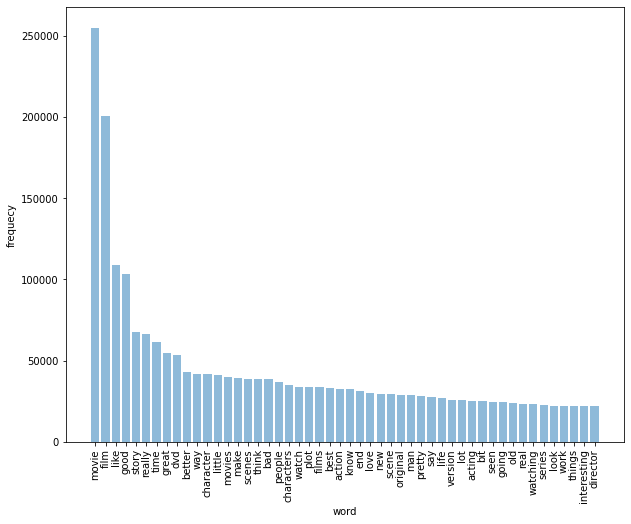

In [58]:
plot_top(df_freq, 50, 'neu')

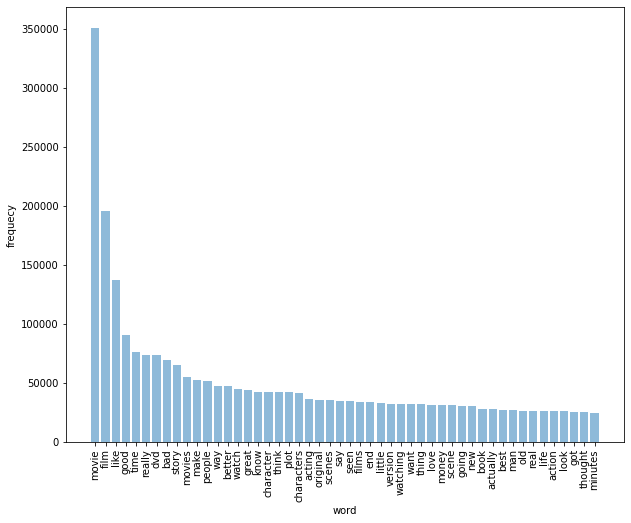

In [59]:
plot_top(df_freq, 50, 'neg')